<div style="background-color: #000000;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-align: center;
           font-size: 35px;
           color: white;
           margin-top: 11px;
           font-weight: 300;">
           Demonstrating usecase of Pipeline and ColumnTransformer using Titanic Dataset
</h1>
</div>

<div style="background-color: #65B741;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: black;
           margin-top: 11px;
           font-weight: 400;">
           Import necessary packages
</h1>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

<div style="background-color: #65B741;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: black;
           margin-top: 11px;
           font-weight: 400;">
           Load the data
</h1>
</div>

In [2]:
df = pd.read_csv('/kaggle/input/data-science-day1-titanic/DSB_Day1_Titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div style="background-color: #65B741;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: black;
           margin-top: 11px;
           font-weight: 400;">
           Let's first drop off the columns which are not required!
</h1>
</div>

In [3]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<div style="background-color: #65B741;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: black;
           margin-top: 11px;
           font-weight: 400;">
           Know... what's the relationship between Pclass(Passenger's Class) and Survival rate
</h1>
</div>

In [5]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

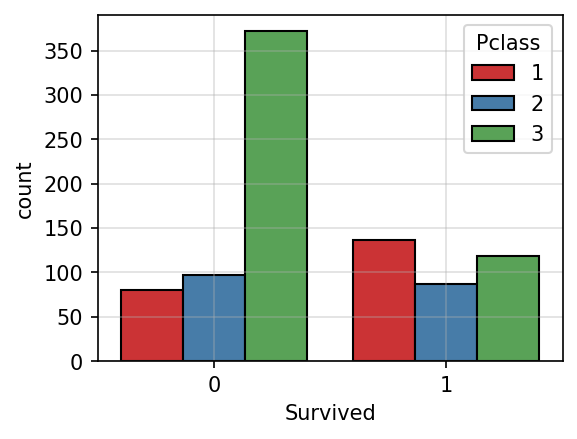

In [6]:
plt.figure(figsize=(4,3), dpi=150)
sns.countplot(data=df, x='Survived', hue='Pclass', palette='Set1', edgecolor='black')
plt.grid(alpha=0.4)
plt.show();

# 0 = dead, 1 = survived.
# from below plot we can say that, better the class, Survival rate is higher.
# here, Pclass 1 seems better than 2 and 3

<div style="background-color: #65B741;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: black;
           margin-top: 11px;
           font-weight: 400;">
           Know what number of people survived or died
</h1>
</div>

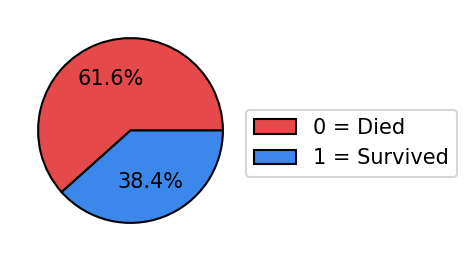

In [7]:
plt.figure(figsize=(3,2), dpi=150)

labels = ['0 = Died', '1 = Survived']
my_colors = ['#e64949', '#3b87eb']

plt.pie(df['Survived'].value_counts(),
        colors=my_colors,
        autopct="%1.1f%%",
        wedgeprops=dict(edgecolor='black'))

plt.legend(labels, loc=(1,0.3))
plt.show();

<div style="background-color: #65B741;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: black;
           margin-top: 11px;
           font-weight: 400;">
           Know... relationship between Sex and Survived
</h1>
</div>

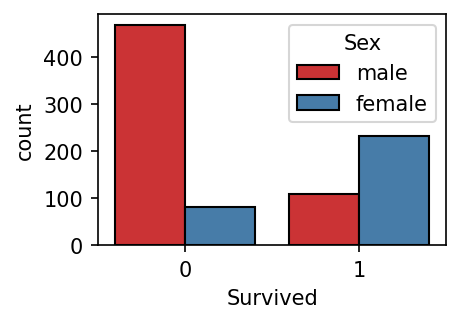

In [8]:
plt.figure(figsize=(3,2), dpi=150)
sns.countplot(data=df, x='Survived', hue='Sex', palette='Set1', edgecolor='black')
plt.show();

# we can see that more number of female's survived in comparision to male

<div style="background-color: #65B741;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: black;
           margin-top: 11px;
           font-weight: 400;">
           Know... what's the mean age of people on titanic
</h1>
</div>

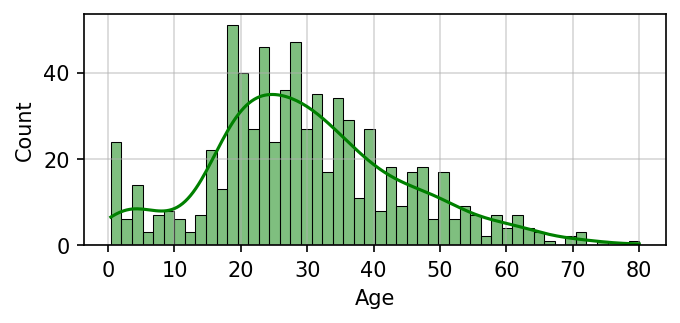

In [9]:
plt.figure(figsize=(5,2), dpi=150)
sns.histplot(data=df, x='Age', bins=50, kde=True, color='green')
plt.grid(alpha=0.5)
plt.show();

# as we can see, age between 18 to 35 and small babies are more on the titanic

<div style="background-color: #65B741;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: black;
           margin-top: 11px;
           font-weight: 400;">
           let's know correlation between Embarked and Survival Feature
</h1>
</div>

In [10]:
df['Embarked'].value_counts()

# S = Southampton
# C = Cherbourg
# Q = Queenstown

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

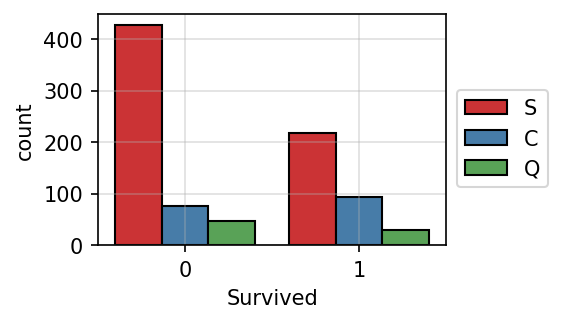

In [11]:
plt.figure(figsize=(3,2), dpi=150)
sns.countplot(data=df, x='Survived', hue='Embarked', palette='Set1', edgecolor='black')
plt.grid(alpha=0.4)
plt.legend(loc=(1.03, 0.25))
plt.show();

# we can see that, public embarked from Southampton died more

<div style="background-color: #65B741;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: black;
           margin-top: 11px;
           font-weight: 400;">
           Check for missing values
</h1>
</div>

In [12]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

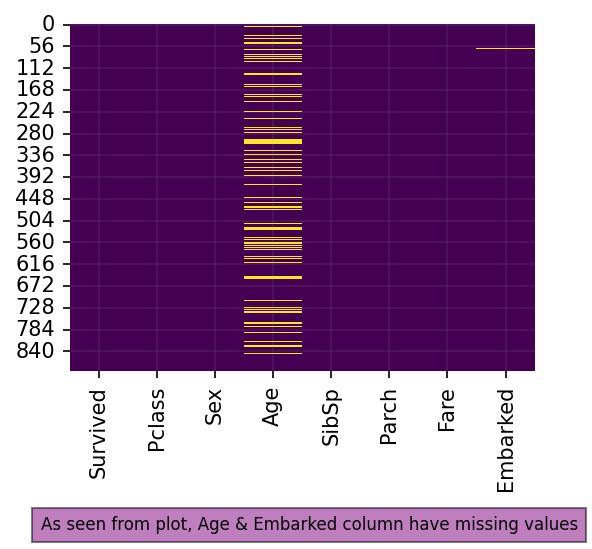

In [13]:
plt.figure(figsize=(4,3), dpi=150)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.text(-0.5, 1300, 'As seen from plot, Age & Embarked column have missing values',
        bbox = dict(facecolor='purple', alpha=0.5),
        fontsize=8)
plt.grid(alpha=0.1)
plt.show();

<div style="background-color: #65B741;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: black;
           margin-top: 11px;
           font-weight: 400;">
           Now let's do train-test-split
</h1>
</div>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']),
                                                   df['Survived'],
                                                   test_size=0.3,
                                                   random_state=42)

In [15]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
445,1,male,4.0,0,2,81.8583,S
650,3,male,NaN,0,0,7.8958,S
172,3,female,1.0,1,1,11.1333,S
450,2,male,36.0,1,2,27.7500,S
314,2,male,43.0,1,1,26.2500,S


In [16]:
y_train.sample(5)

624    0
264    0
577    1
452    0
564    0
Name: Survived, dtype: int64

<div style="background-color: #65B741;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: black;
           margin-top: 11px;
           font-weight: 400;">
           let's create Column Transformers:
</h1>
    
 <ul style="list-style-type: disc; margin-left: 20px;">
        <li style="color: black;
                   font-size: 18px">
            Imputation Transformer
        </li>
</ul>
    
</div>

In [17]:
"""
1. remainder='passthrough' tells the ColumnTransformer,
    to handle columns not explicitly specified in transformers list.

2. It includes those columns in the output DataFrame without applying any transformations.
"""
trf1 = ColumnTransformer([
    ('impute_age', SimpleImputer(strategy='mean'), [2]), # [2] indicates 'age' column,
    ('impute_embarked', SimpleImputer(strategy='most_frequent'), [6]) # [6] indicates 'embarked' column
], remainder='passthrough')

<div style="background-color: #65B741;
            border-radius: 10px;
            border-style: solid;">
    
<ul style="list-style-type: disc; margin-left: 20px;">
        <li style="color: black;
                   margin-top: 11px;
                   font-size: 18px">
            One Hot Encoding Transformer
        </li>
</ul>
    
</div>

In [18]:
trf2 = ColumnTransformer([
    ('ohe_sex_embarked',
     OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
    [1, 6])
], remainder='passthrough')

<div style="background-color: #65B741;
            border-radius: 10px;
            border-style: solid;">
    
<ul style="list-style-type: disc; margin-left: 20px;">
        <li style="color: black;
                   margin-top: 11px;
                   font-size: 18px">
            Scaling Transformer... <br>
            MinMaxScaler formula:
        </li>
</ul>
    
</div>

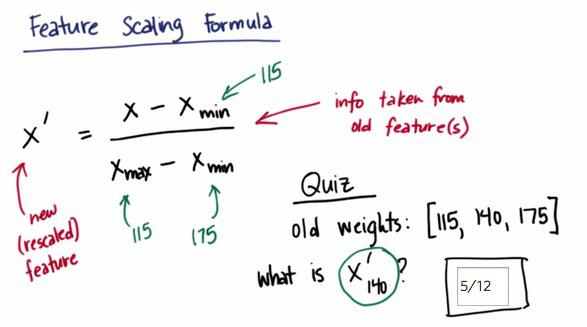

In [19]:
trf3 = ColumnTransformer([
    ('scale', MinMaxScaler(), slice(0, 10))
])  

# slice(0, 8) means the MinMaxScaler() transformation will be applied on all columns

<div style="background-color: #65B741;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: black;
           margin-top: 11px;
           font-weight: 400;">
           create the instance of <b>RandomForestClassifier</b> model
</h1>
</div>

In [20]:
rf_model = RandomForestClassifier()

<div style="background-color: #65B741;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: black;
           margin-top: 11px;
           font-weight: 400;">
           let's create <b>Pipeline</b>
</h1>
    
<ul style="list-style-type: disc; margin-left: 20px;">
    <li style="color: black;
               font-size: 18px">
        Difference between using Pipeline VS make_pipeline:
    </li>
    <ol>
        <li style="color: black; font-size: 14px">Pipeline requires naming of steps, make_pipeline does not!</li>
        <li style="color: black; font-size: 14px">Same applies to ColumnTransformer VS make_column_transformer.</li>
    </ol>
</ul>
    
</div>

In [21]:
pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('rf_model', rf_model)
])

In [ ]:
# Alternate syntax:
# pipe = make_pipeline(trf1, trf2, trf3, dt_model)

<div style="background-color: #65B741;
            border-radius: 10px;
            border-style: solid;">
    
<ul style="list-style-type: disc; margin-left: 20px;">
    <li style="color: black;
               font-size: 18px">
        Note:
    </li>
    <ol>
        <li style="color: black; font-size: 14px">When pipeline doesn't consist of model instantiation step, then we need to call .fit_transform() method rather than simply calling .fit() method, as we're just doing Data Preprocessing and not doing model training.</li>
        <li style="color: black; font-size: 14px">And if we are instantiating model's class in Pipeline, then just simply call .fit() method!</li>
    </ol>
</ul>
    
</div>

In [22]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('rf_model', RandomForestClassifier())])

<div style="background-color: #65B741;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: black;
           margin-top: 11px;
           font-weight: 400;">
           let's explore pipeline's attribute
</h1>
</div>

In [23]:
pipe.named_steps # shows all particular steps which this pipeline follows

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(), [2]),
                                 ('impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  [1, 6])]),
 'trf3': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10, None))]),
 'rf_model': RandomForestClassifier()}

In [24]:
pipe.named_steps['trf1']

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute_age', SimpleImputer(), [2]),
                                ('impute_embarked',
                                 SimpleImputer(strategy='most_frequent'),
                                 [6])])

In [25]:
pipe.named_steps['trf1'].transformers_ # so basically there are 3 transformers in 1st ColumnTransformer

[('impute_age', SimpleImputer(), [2]),
 ('impute_embarked', SimpleImputer(strategy='most_frequent'), [6]),
 ('remainder', 'passthrough', [0, 1, 3, 4, 5])]

<div style="background-color: #65B741;
            border-radius: 10px;
            border-style: solid;">
    
<ul style="list-style-type: disc; margin-left: 20px;">
        <li style="color: black;
                   margin-top: 11px;
                   font-size: 18px">
            now to know, what is the mean value of impute_age after performing SimpleImputer...
        </li>
</ul>
    
</div>

In [26]:
pipe.named_steps['trf1'].transformers_[0][1].statistics_

# Hence this is how we can explore our parameters and know values by using attributes of pipeline object

array([29.25635271])

<div style="background-color: #65B741;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: black;
           margin-top: 11px;
           font-weight: 400;">
           let's predict now
</h1>
</div>

In [27]:
y_pred = pipe.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.6007462686567164

<div style="background-color: #65B741;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: black;
           margin-top: 11px;
           font-weight: 400;">
           <b>Cross Validation</b> using Pipeline
</h1>
</div>

In [29]:
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

0.6516516129032258

## Received 65% accuracy, can be improved through exploring dataset in depth and doing more Hyperparameter tuning!

<div style="background-color: #65B741;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: black;
           margin-top: 11px;
           font-weight: 400;">
           <b>GridSearchCV</b> using Pipeline (Hyperparameter Tuning)
</h1>
</div>

In [32]:
params = {
    'rf_model__max_depth' : [1, 2, 3, 4, 5, None]
}

In [33]:
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_age',
                                                                         SimpleImputer(),
                                                                         [2]),
                                                                        ('impute_embarked',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [6])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_sex_embarked',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         [1,
                                                                          6])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         slice(0, 10, None))])),
                                       ('rf_model', RandomForestClassifier())]),
             param_grid={'rf_model__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [34]:
grid.best_score_

0.6516516129032258

In [35]:
grid.best_params_

{'rf_model__max_depth': 2}

<div style="background-color: #65B741;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: black;
           margin-top: 11px;
           font-weight: 400;">
           Exporting the Pipeline
</h1>
</div>

In [36]:
import pickle
pickle.dump(pipe, open('pipe.pkl', 'wb')) # wb = write binary mode

<div style="background-color: #65B741;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: black;
           margin-top: 11px;
           font-weight: 400;">
           Now the Production Code will be...
</h1>
</div>

In [37]:
pipe = pickle.load(open('pipe.pkl', 'rb')) # rb = read binary mode

In [38]:
test_input = np.array([
    2, 'male', 31.0, 0, 0, 10.5, 'S'
], dtype=object).reshape(1, 7)

In [39]:
test_input.shape

(1, 7)

In [40]:
pipe.predict(test_input)

array([0])

## array([0]) indicates that Person is not Survived

<div style="background-color: #65B741;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 20px;
           color: black;
           margin-top: 11px;
           font-weight: 400;">
           <b>Conclusion:</b> As we can see, at Production level we don't need to again perform Transformation steps because that is automatically been taken care by Pipeline!
</h1>
</div>

<div style="background-color: white;
            padding: 1px;
            border-radius: 7px;
            border-style: solid;
            box-shadow: 0 6px 10px rgba(0, 0, 0, 0.15);">
    
<h1 style="font-family: 'Noto Sans Mono', monospace;
           text-align: center;
           font-size: 40px;
           color: black;
           margin-bottom: 20px;
           font-weight: 100;">
           If you find this notebook helpful, you can upvote it :)
</h1>
</div>